## 聚类 Clustering

- 聚类就是通过对样本静态特征的分析，把相似的对象，分成不同子集（簇），被分到同一子集中的样本对象都具有相似的属性。
- 在机器学习领域，聚类属于无监督学习算法。
- 许多聚类算法在执行之前，需要指定从输入数据集中产生的分簇的个数。除非事先准备好一个合适的值，否则必须决定一个大概值。
- 通常情况下，在聚类算法中，样本的属性主要由其在特征空间中的相对距离来表示，几种常见的距离计算方法：
    - 欧氏距离
    - 余弦距离
    - 曼哈顿距离

## KMeans

- KMeans是一种聚类算法，k是一个常数值，由使用者指定，这种算法负责将特征空间中的n个向量聚集到k个簇中。
- KMeans算法过程：
    1. 用户确定k值，并将n个样本投射为特征空间（一般为欧氏空间）中的n个点(k<=n)。
    2. 算法在这n个点中随机选取k个点，作为初始的“簇核心”。
    3. 分别计算每个样本点到k个簇核心的距离（一般取欧氏距离了或余弦距离），找到离该点最近的簇核心，将它归属到对应的簇。
    4. 所有点都归属到簇之后，n个点就分成了k个簇，之后重新计算每个簇的重心（平均距离中心），将其定为新的“簇核心”。
    5. 反复迭代Step3 - 4，直到簇核心不再移动为止。
    
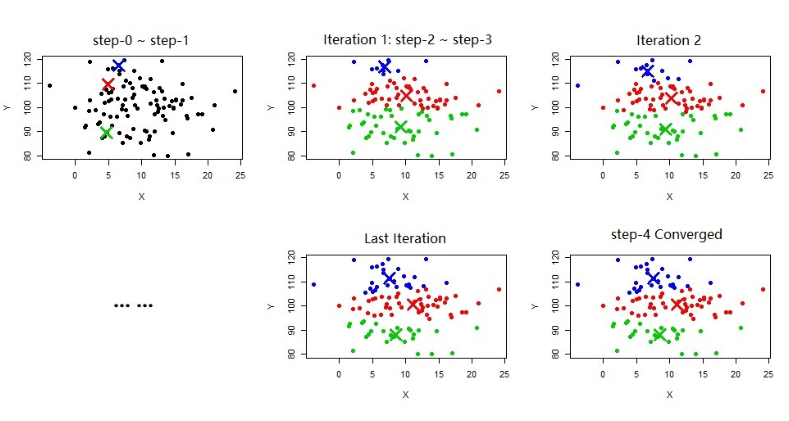

## KMeans入门实例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 训练数据：10个人的身高（cm）和体重（kg）
X = np.array([
    [185.4, 72.6],
    [155.0, 54.4],
    [170.2, 99.9],
    [172.2, 97.3],
    [157.5, 59.0],
    [190.5, 81.6],
    [188.0, 77.1],
    [167.6, 97.3],
    [172.7, 93.3],
    [154.9, 59.0]
])

In [10]:
# 训练模型
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print(y_kmeans)

[2 1 0 0 1 2 2 0 0 1]


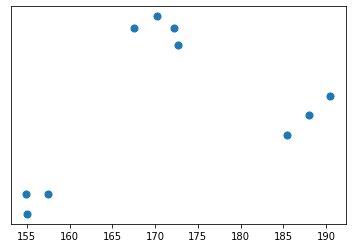

In [7]:
# 数据可视化
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.yticks(())
plt.show()

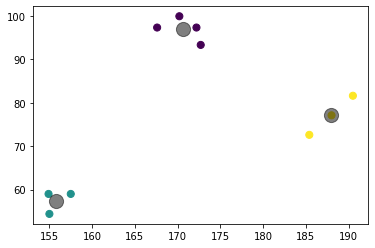

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [9]:
# 预测两个新样本
print(kmeans.predict([[170.0, 60], [155.0, 50]]))

[1 1]


## 使用KNN预测

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# 标签
y = [2, 1, 0, 0, 1, 2, 2, 0, 0, 1]

# 训练模型
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# 预测新样本
print(neigh.predict([[170.0, 60], [155.0, 50]]))

[1 1]


## 谱聚类

- 无需事先指定簇数量的聚类。
- 基于图切割的谱聚类算法过程分为两个大的步骤：图切割和谱聚类。
- 谱聚类的目的就是要找到一种合理的分割，使得分割后形成若干子图，连接不同子图的边的权重尽可能低，同一子图内边的权重尽可能高。

In [17]:
# 将10个人的身高体重用谱聚类进行聚类

from sklearn.cluster import SpectralClustering
import math

w,h = 10, 10

# 构建相似度矩阵
# 任意两个样本间的相似度 = 100 - 两个样本的欧氏距离
Matrix = [[100- math.hypot(X[x][0]- X[y][0], X[x][1]- X[y][1]) for x in range(w)] for y in range(h)]

sc = SpectralClustering(3, affinity='precomputed', n_init=10)
sc.fit(Matrix)

print(sc.labels_)

[2 1 0 0 1 2 2 0 0 1]
